In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
example = 'laplace'
script = 'generate_example'

In [3]:
# import os
# matlab_path = "/Applications/MATLAB_R2023a.app/bin/matlab"
# examplematlab = "\'"+example+"\'"
# matlabcmd = f"{matlab_path} -nodisplay -nosplash -nodesktop -r \"{script}({examplematlab}); exit;\" | tail -n +11"
# with open("temp.sh", 'w') as f:
#     f.write(matlabcmd)
#     f.close()
# os.system(f"bash temp.sh")
# os.remove("temp.sh")

In [4]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95, batch_size = 1024)

Metal device set to: Apple M1 Pro


In [5]:
model = GreenNN()
model.build()

Using tensorflow 2.9.0


In [7]:
%%time
lossHistory = model.train(data, epochs = {'adam':10000})

Loss at epoch 100: Training = 2.735E-03, Validation = 4.669E-03
Loss at epoch 200: Training = 5.456E-04, Validation = 7.068E-04
Loss at epoch 300: Training = 2.837E-04, Validation = 3.100E-04
Loss at epoch 400: Training = 1.895E-04, Validation = 1.957E-04
Loss at epoch 500: Training = 1.474E-04, Validation = 1.490E-04
Loss at epoch 600: Training = 1.229E-04, Validation = 1.225E-04
Loss at epoch 700: Training = 1.073E-04, Validation = 1.064E-04
Loss at epoch 800: Training = 9.657E-05, Validation = 9.588E-05
Loss at epoch 900: Training = 8.873E-05, Validation = 8.857E-05
Loss at epoch 1000: Training = 8.279E-05, Validation = 8.319E-05
Loss at epoch 1100: Training = 7.820E-05, Validation = 7.909E-05
Loss at epoch 1200: Training = 7.458E-05, Validation = 7.588E-05
Loss at epoch 1300: Training = 7.170E-05, Validation = 7.332E-05
Loss at epoch 1400: Training = 6.938E-05, Validation = 7.124E-05
Loss at epoch 1500: Training = 6.749E-05, Validation = 6.954E-05
Loss at epoch 1600: Training = 6.5

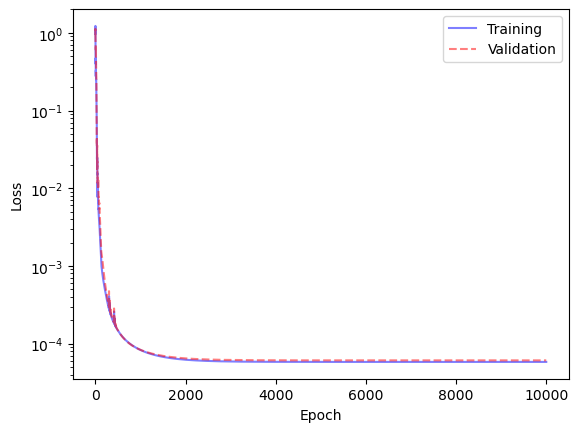

In [8]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [9]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

AttributeError: EagerTensor object has no attribute 'reshape'. 
        If you are looking for numpy-related methods, please run the following:
        from tensorflow.python.ops.numpy_ops import np_config
        np_config.enable_numpy_behavior()
      

In [10]:
model.saveModels('savedModels/laplace')

INFO:tensorflow:Assets written to: savedModels/laplace/G/assets
INFO:tensorflow:Assets written to: savedModels/laplace/N/assets
